
## MED 3

# Regresja wielomianowa

Wczytanie niezbędnych bibliotek


In [56]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os as os
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# 1. Wprowadzenie teoretyczne

Celem regresji wielomianowej jest dopasowanie do danych doświadczalnych/historycznych wykresu funkcji, która oddaje charakter tych danych. 

Zadanie polega na znalezieniu wielomianu $\hat{f}(x)$ postaci:

$$\hat{f}(x)=w_0+w_1 x^1+w_2x^2+ … +w_n x^n,$$

gdzie $x \in R$, a $w∈R^N$ jest wektorem zawierającym współczynniki wielomianu. 

To właśnie na znalezieniu wektora $w$ będziemy skupiać uwagę.

Mając dane historyczne  $X={x_1,x_2,…,x_k}$ oraz odpowiadające im wartości $Y={y_1,y_2,…,y_k}$ będziemy poszukiwać najlepiej dopasowanego wektora $w$. Co to dla nas znaczy?

W efekcie musimy znaleźć takie parametry modelu (wielomianu), które zminimalizują nam sumę kwadratów błędu (RSE). 

Czyli takiego, dla którego wartości zwracane przez funkcję $\hat{f}$ i odpowiadające im wartości rzeczywiste najmniej się różnią. 
Załóżmy, że mamy już wybrany wektor np. $w=[1,0.5,0,0,2,0.3,…,1]$ 
możemy obliczyć:

$$\hat{f}(x_1)=w_0 + w_1x_1^1+w_2x_1^2+...+w_nx_1^n$$

$$\hat{f}(x_2)=w_0 + w_1x_2^1+w_2x_2^2+...+w_nx_2^n$$

$$\vdots$$

$$\hat{f}(x_k)=w_0 + w_1x_k^1+w_2x_k^2+...+w_nx_k^n$$

Błąd dopasowania możemy wyliczyć poprzez porównanie wartości otrzymanej dla danego argumentu $\hat{f}(x_i)$ z wartością rzeczywistą $y_i$ odpowiadającą temu argumentowi, stąd mamy

$$e^1=\hat{f}(x_1)−y_1$$
$$e^2=\hat{f}(x_2)−y_2$$
$$\vdots$$
$$e^k=\hat{f}(x_k)−y_k$$


Następnie sumując kwadraty błędów $e^1, … , e^k$ otrzymujemy wartość błędów dla danych parametrów modelu:

$$E(w)=\sum_{i=1}^k\left(\hat{f}(x_i)−y_i\right)^2$$

Chcemy aby suma kwadratów błędów była jak najmniejsza dla danego stopnia wielomianu, a to co możemy zmieniać to wartości współczynników wektora $w$. 

Powyższe analizy możmy zapisać w postaci macierzowej.
$$ X  w = Y ,$$ gdzie

$$X = \left|\begin{array}{cccc}
1&x_1&...&x_1^n\\
1&x_2&...&x_2^n\\
\vdots&\vdots&\vdots&\vdots\\
1&x_k&...&x_k^n\end{array}\right|, $$

$$w = \left|\begin{array}{c}
w_0\\
w_1\\
...\\
w_n\end{array}\right|, $$


$$Y = \left|\begin{array}{c}
y_0\\
y_1\\
...\\
y_k\end{array}\right|. $$

Ponieważ w ogólnym przypadku macierz $X$ jest macierzą prostokątną, więc nie można jej odwrócić (nie da się wyzerować błędu aproksymacji), za to możemy znaleźć rozwiązanie przybliżone (takie, które minimalizuje nasz błąd):

$$\min_w||Xw−Y||_2^2$$

Rozwiązaniem, które jest w stanie zminimalizować nam sumę kwadratów błędu jest równanie:

$$ w=X^+Y,$$ 

gdzie $X^+$ jest pseudoodwrotnością macierzy $X$.

# 2. Od korelacji do prostej regresji liniowej

Miara korelacji (Pearsona) pozwala na stwierdzenie stopnia zależności liniowej atrybutów (cech). Dla przypomnienia - zbiór `iris`

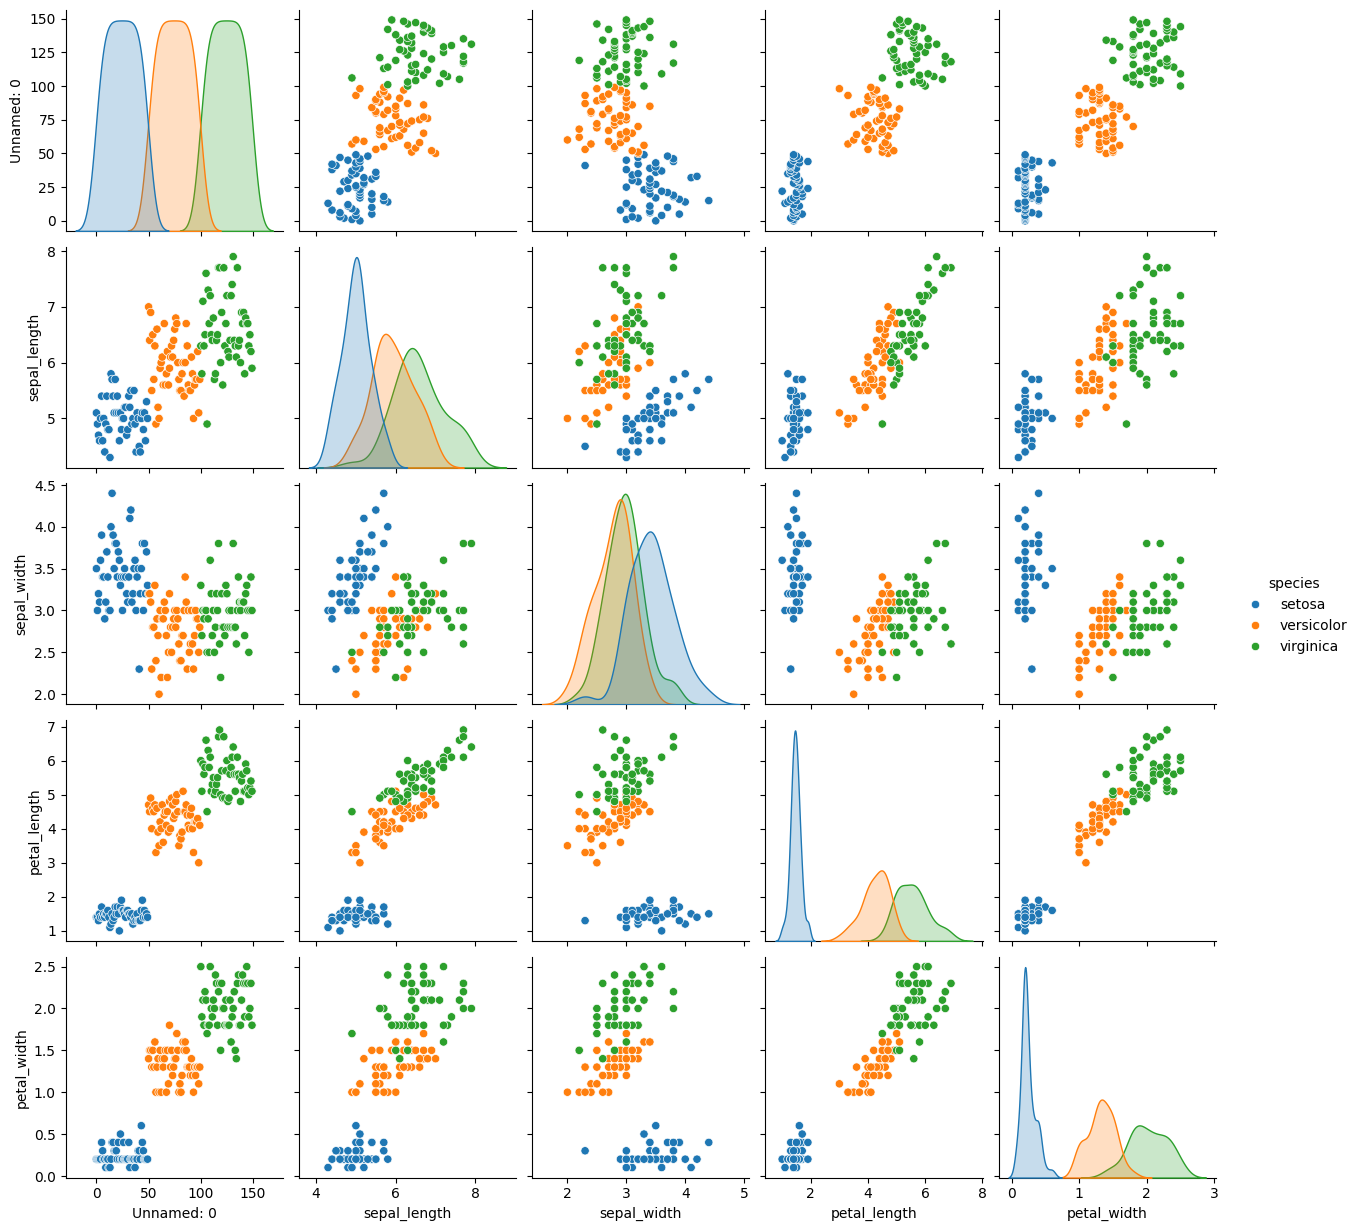

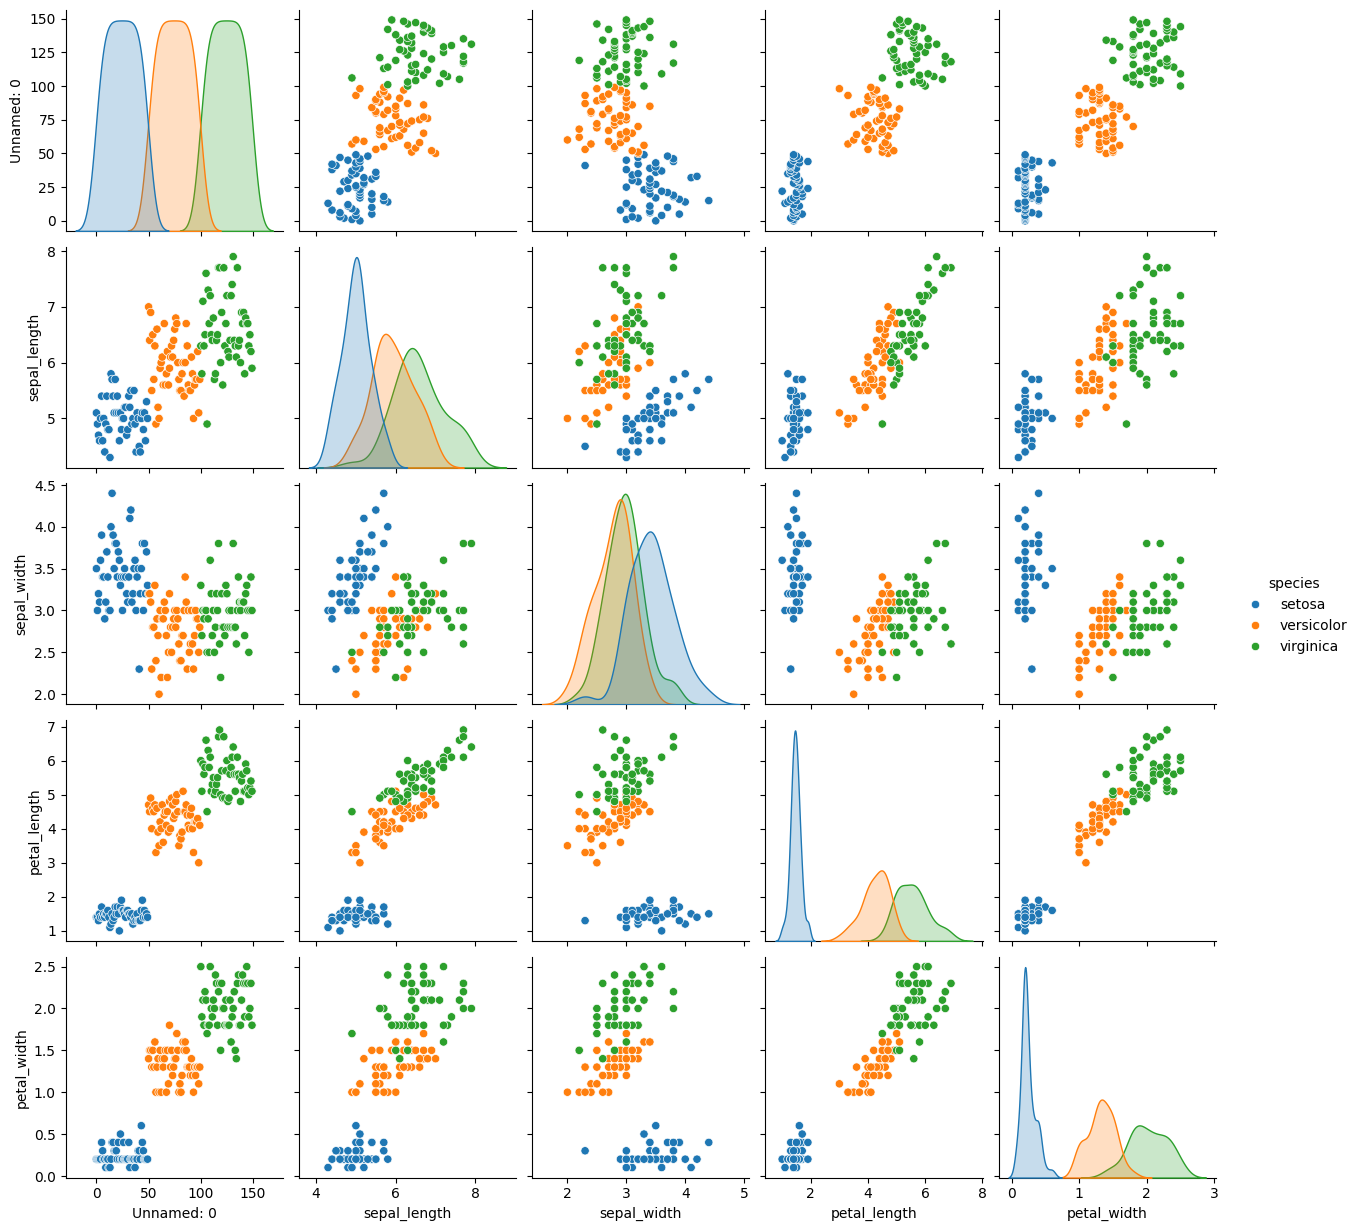

<Axes: >

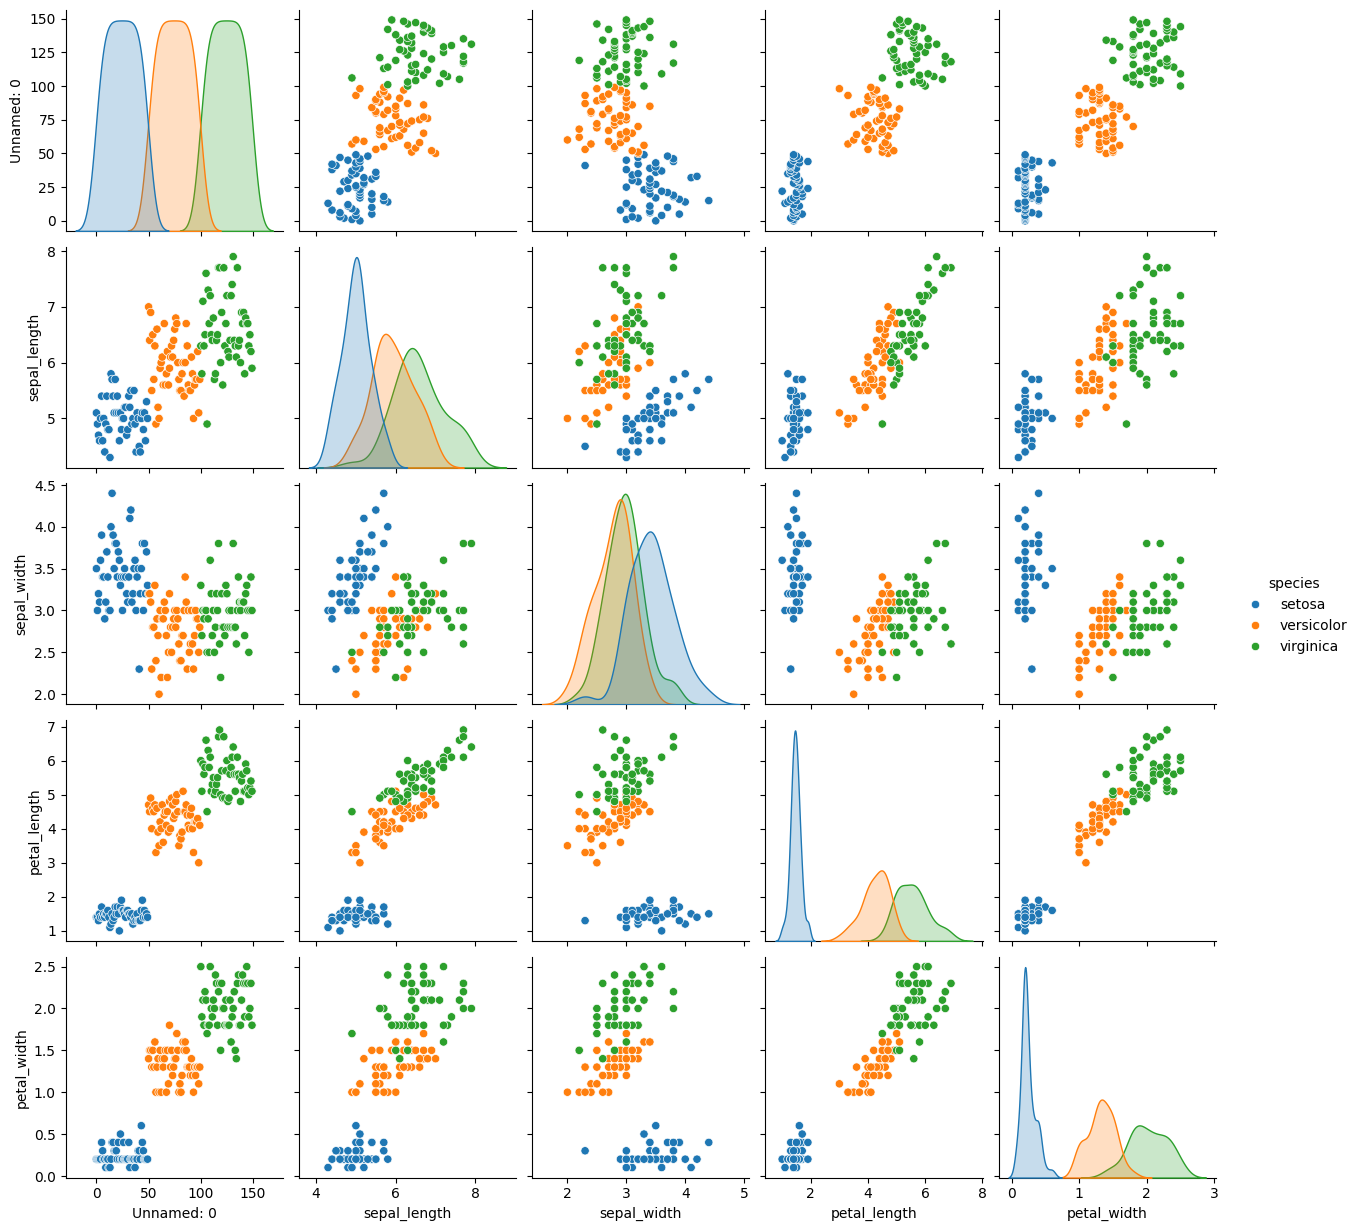

<Axes: >

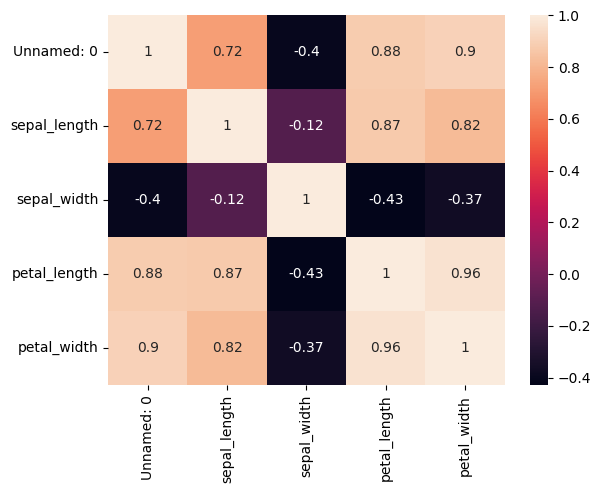

In [57]:



iris = pd.read_csv("iris.csv")
iris.head()


sns.pairplot(iris, kind="scatter", hue = "species")
plt.show()
sns.heatmap(iris.corr(numeric_only=True), annot=iris.corr(numeric_only=True))

> **Zadanie** Wskaż atrybuty najbardziej i najmniej skorelowane

**Odpowedź**: Najbardziej skorelowane: petal_length z petal_width ≈ 0.96 (bardzo silna dodatnia korelacja).

Najmniej skorelowane: sepal_length z sepal_width ≈ −0.12 (korelacja bliska zeru).

---

Miara korelacji Pearsona odpowiada na pytanie *$czy$* (w jakim stopniu) dane atrybuty ($x,y$) są od siebie zależne liniowo. Odpowiedzi na pytanie *$jak$* od siebie zależą, udzieli model regresyjny. W tym przypadku będzie badany najprostszy model regresji wielomianowej tj. prosta regresja liniowa. Jej wynikiem jest linia prosta $$\hat y = \hat{f}(x) = w_0 + w_1 \cdot x,$$ która pozwala na oszacowanie wartości atrybutu $y$ na podstawie atrybutu $x$. 

Przykład - tworzenie modelu regresyjnego zależności czwartego atrybutu (petal width) od pierwszego (sepal length). Metoda `iloc` umożliwia odwołanie do elementów ramki danych przez ich indeksy, `values` konwertuje wynikową ramkę danych na postać wektora, `reshape` zamienia wektor na macierz o jednej kolumnie. `T` oznacza transpozycję, dzięki której łatwiej zmieścić wydruk w oknie.

In [58]:
x = iris.iloc[:,0].values.reshape(-1,1)
y = iris.iloc[:,3].values.reshape(-1,1)
print(x.T)
print(y.T)

[[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
   18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
   36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
   54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
   72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
   90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
  108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
  126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
  144 145 146 147 148 149]]
[[1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 1.5 1.6 1.4 1.1 1.2 1.5 1.3 1.4
  1.7 1.5 1.7 1.5 1.  1.7 1.9 1.6 1.6 1.5 1.4 1.6 1.6 1.5 1.5 1.4 1.5 1.2
  1.3 1.4 1.3 1.5 1.3 1.3 1.3 1.6 1.9 1.4 1.6 1.4 1.5 1.4 4.7 4.5 4.9 4.
  4.6 4.5 4.7 3.3 4.6 3.9 3.5 4.2 4.  4.7 3.6 4.4 4.5 4.1 4.5 3.9 4.8 4.
  4.9 4.7 4.3 4.4 4.8 5.  4.5 3.5 3.8 3.7 3.9 5.1 4.5 4.5 4.7 4.4 4.1 4.
  4.4 4.6 4. 

Tworzenie modelu regresyjnego.

In [59]:
regressor = LinearRegression()  
regressor.fit(x,y) 

LinearRegression()

Parametrami prostego modelu liniowego $\hat y = \hat{f}(x) = w_0 + w_1 \cdot x$ są $w_0$ (intercept) oraz $w_1$ (slope). W naszym modelu są one równe odpowiednio

In [60]:
# w0
print(regressor.intercept_)
# w1
print(regressor.coef_)

[1.0861457]
[[0.03586382]]


Znając funkcję $\hat{f}(x)$ modelu liniowego możemy dla wektora $x$ wyznaczyć przewidywane wartości $y$, które dla odróżnienia od rzeczywistych zostaną umieszczone w innym wektorze ($y_{pred}$).

In [61]:
y_pred = regressor.predict(x)
y_pred.T

array([[1.0861457 , 1.12200951, 1.15787333, 1.19373714, 1.22960096,
        1.26546478, 1.30132859, 1.33719241, 1.37305622, 1.40892004,
        1.44478386, 1.48064767, 1.51651149, 1.55237531, 1.58823912,
        1.62410294, 1.65996675, 1.69583057, 1.73169439, 1.7675582 ,
        1.80342202, 1.83928583, 1.87514965, 1.91101347, 1.94687728,
        1.9827411 , 2.01860492, 2.05446873, 2.09033255, 2.12619636,
        2.16206018, 2.197924  , 2.23378781, 2.26965163, 2.30551545,
        2.34137926, 2.37724308, 2.41310689, 2.44897071, 2.48483453,
        2.52069834, 2.55656216, 2.59242597, 2.62828979, 2.66415361,
        2.70001742, 2.73588124, 2.77174506, 2.80760887, 2.84347269,
        2.8793365 , 2.91520032, 2.95106414, 2.98692795, 3.02279177,
        3.05865558, 3.0945194 , 3.13038322, 3.16624703, 3.20211085,
        3.23797467, 3.27383848, 3.3097023 , 3.34556611, 3.38142993,
        3.41729375, 3.45315756, 3.48902138, 3.52488519, 3.56074901,
        3.59661283, 3.63247664, 3.66834046, 3.70

Wizualizacja danych i prostej regresji.

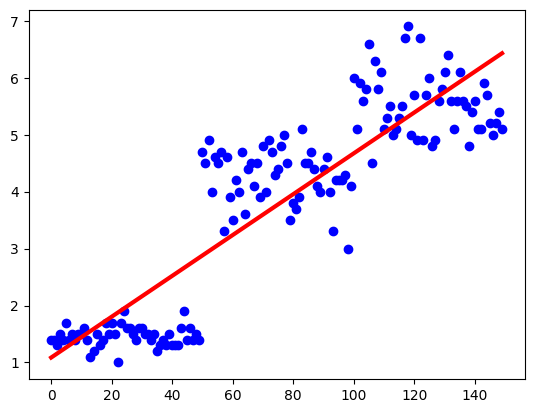

In [62]:
plt.scatter(x, y,  color='blue')
plt.plot(x, y_pred, color='red', linewidth=3)
plt.show()

Jakość modelu możemy ocenić wykorzystując np. bład średniokwadratowy: 

In [63]:
e = metrics.mean_squared_error(y, y_pred)
e

0.6839598943953065

> **Zadanie** Napisz funkcję, która zwróci parametry $w_0$ oraz $w_1$ modelu prostej regresji liniowej oraz $e$ wartość błędu średniokwadratowego dopasowania. Argumentem będzie ramka danych oraz numery dwóch atrybutów.

In [64]:
def linear_regression_model(df, col_x, col_y):
    
    x = df.iloc[:, col_x].to_numpy()
    y = df.iloc[:, col_y].to_numpy()
    
    # np.polyfit zwraca [w1, w0] dla wielomianu stopnia 1
    w1, w0 = np.polyfit(x, y, 1)
    
    # Oblicz predykcje
    y_pred = w0 + w1 * x
    
    # Oblicz błąd średniokwadratowy
    mse = np.mean((y - y_pred)**2)
    
    return w0, w1, mse


# Test funkcji
iris = pd.read_csv("iris.csv")
w0, w1, mse = linear_regression_model(iris, 0, 3)
print(f"w0 (wyraz wolny) = {w0:.4f}")
print(f"w1 (nachylenie)  = {w1:.4f}")
print(f"MSE (błąd)       = {mse:.4f}")


w0 (wyraz wolny) = 1.0861
w1 (nachylenie)  = 0.0359
MSE (błąd)       = 0.6840


> **Zadanie** Korzystając z powyższej funkcji oceń modele regresyjne dla poszczególnych par atrybutów. Dla których par błąd dopasowania (obciążenie / bias) modelu jest największa, a dla których - najmniejsza. Czy można zauważyć zależność tej miary od miary korelacji ?


In [65]:
cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

for i in range(len(cols)):
    for j in range(len(cols)):
        if i != j:
            w0, w1, e = linear_regression_model(iris, i, j)
            print(f"{cols[i]} → {cols[j]} | MSE = {e:.4f}")

sepal_length → sepal_width | MSE = 0.3313
sepal_length → petal_length | MSE = 0.1582
sepal_length → petal_width | MSE = 0.6840
sepal_width → sepal_length | MSE = 911.9128
sepal_width → petal_length | MSE = 0.1861
sepal_width → petal_width | MSE = 0.7431
petal_length → sepal_length | MSE = 1571.4687
petal_length → sepal_width | MSE = 0.6717
petal_length → petal_width | MSE = 2.5273
petal_width → sepal_length | MSE = 414.2680
petal_width → sepal_width | MSE = 0.1635
petal_width → petal_length | MSE = 0.1541


Największy błąd regresji liniowej pojawia się dla sepal_width i petal_length, natomiast najmniejszy dla petal_length i petal_width. Wyniki te potwierdzają, że silna korelacja między zmiennymi prowadzi do niższego błędu dopasowania, a słaba korelacja skutkuje wyższym MSE.

# 3. Błąd uczenia i generalizacji

Sprawdzenie skuteczności modelu regresyjnego wymaga wcześniejszego podziału referencyjnego zbioru danych na (w najprostszym przypadku) dwa podzbiory: uczący i testowy. Pierwszy jest wykorzystywany do wyznaczeniu parametrów modelu regresyjnego, drugi - do testowania modelu. Błąd predykcji dla zbioru uczącego to błąd uczenia, określający stopień dopasowania modelu do znanych danych. Błąd predykcji dla zbioru testowego pokazuje przydatność modelu do przewidywania dla danych, które nie zostały wykorzystane w procesie uczenia. Pokazuje on na ile model jest ogólny tzn. sprawdza się dla dowolnych danych i dlatego jest nazywany błędem generalizacji.

Zbiór `dane10` zawiera dane charakteryzujące się dwoma atrybutami opisującymi (cechami) należące do trzech klas. Każda klasa definiuje jeden podzbiór danych. Podzbiory te wykorzystamy do badania modeli regresyjnych.

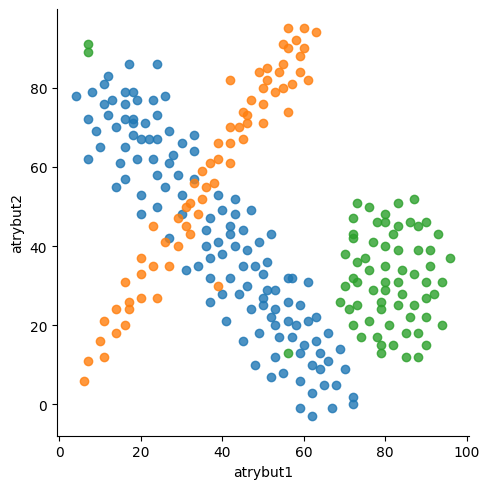

In [66]:
d = pd.read_csv('dane10.csv')
sns.lmplot( x="atrybut1", y="atrybut2", data=d, fit_reg=False, hue='klasa', legend=False)

Wybieramy podzbiór `klasa 3` i generujemy modeli liniowy.

In [67]:
dd = d[d.klasa == 'klasa 3']
x = dd.iloc[:,0].values.reshape(-1,1)
y = dd.iloc[:,1].values.reshape(-1,1)
print(x.T)
print(y.T)

[[61 66 69 72 62 62 59 55 52 48 45 37 40 41 34 37 31 27 20 14  7  4 17 26
  33 43 47 52 57 63 70 72 67 59 53 59 56 49 51 49 47 46 45 43 40 36 37 33
  30 24 30 36 39 33 18 24 30 27 23 16  7 10 20  9 15 24 12 16 19 24 29 26
  21 18 20 16 16 11 11  8 12 14 18 13 18 16 19 23 22 28 27 24 68 64 64 66
  65 63 59 62 61 58 60 57 56 56 51 53 53 50 48 45 43 42 42 40 39 37 42 44
  46 50 50 52 53 54]]
[[31 18 14  2 -3  3 -1  8  7 10 16 32 28 21 35 26 34 42 48 55 62 78 86 78
  68 52 49 43 32 22  9  0 -1  6 12 25 32 18 36 41 24 39 44 48 49 40 47 64
  53 50 48 44 53 57 79 73 66 69 77 57 72 65 53 69 61 86 83 79 77 67 58 55
  71 68 67 72 76 76 81 79 73 70 71 77 72 65 62 62 67 63 61 58  5  9 13 11
   5 16 13 10 21 20 15 17 21 26 29 24 29 33 35 35 40 45 43 38 41 37 32 28
  30 27 25 22 20 17]]


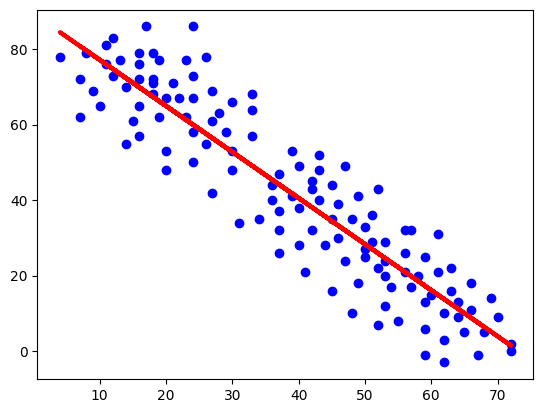

In [68]:
%matplotlib inline
regressor = LinearRegression()  
regressor.fit(x,y) 
y_pred = regressor.predict(x)
plt.scatter(x, y,  color='blue')
plt.plot(x, y_pred, color='red', linewidth=3)
plt.show()


> **Zadanie** Obejrzyj modele dla podzbiorów należących do innych klas. Zwróć szczególną uwage na klasę nr 1.

Badanie modeli regresyjnych z podziałem na zbiór uczący i testowy

In [69]:
x_ucz, x_test, y_ucz, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

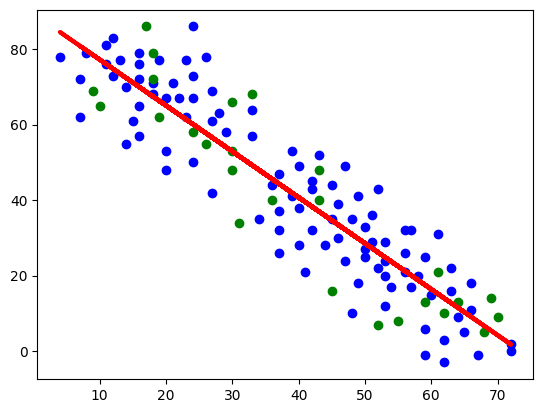

błąd uczenia 97.90961693115158
błąd generalizacji 109.05710100604452


In [70]:
regressor = LinearRegression()  
regressor.fit(x_ucz,y_ucz) 
y_pred_ucz = regressor.predict(x_ucz)
e_ucz = metrics.mean_squared_error(y_ucz, y_pred_ucz)
y_pred_test = regressor.predict(x_test)
e_test = metrics.mean_squared_error(y_test, y_pred_test)
plt.scatter(x_ucz, y_ucz, color='blue')
plt.scatter(x_test, y_test, color='green')
plt.plot(x_ucz, y_pred_ucz, color='red', linewidth=3)
plt.show()
print('błąd uczenia',e_ucz)
print('błąd generalizacji',e_test)

> **Zadanie** Zbadaj błąd uczenia i generalizacji dla wszystkich trzech klas, dla każdej kilkukrotnie powtarzając podział zbioru na uczący i testowy. Oceń stabilość modeli tj. zmienność parametrów modelu dla różnych podziałów. Dla których klas uzyskane modele są bardziej, a dla których - mniej stabilne? Dlaczego?

klasa 1 → MSE (train): 143.7606, MSE (test): 195.5516
klasa 2 → MSE (train): 48.4543, MSE (test): 10.1807
klasa 3 → MSE (train): 97.9096, MSE (test): 109.0571


klasa 1 → MSE (train): 143.7606, MSE (test): 195.5516
klasa 2 → MSE (train): 48.4543, MSE (test): 10.1807
klasa 3 → MSE (train): 97.9096, MSE (test): 109.0571


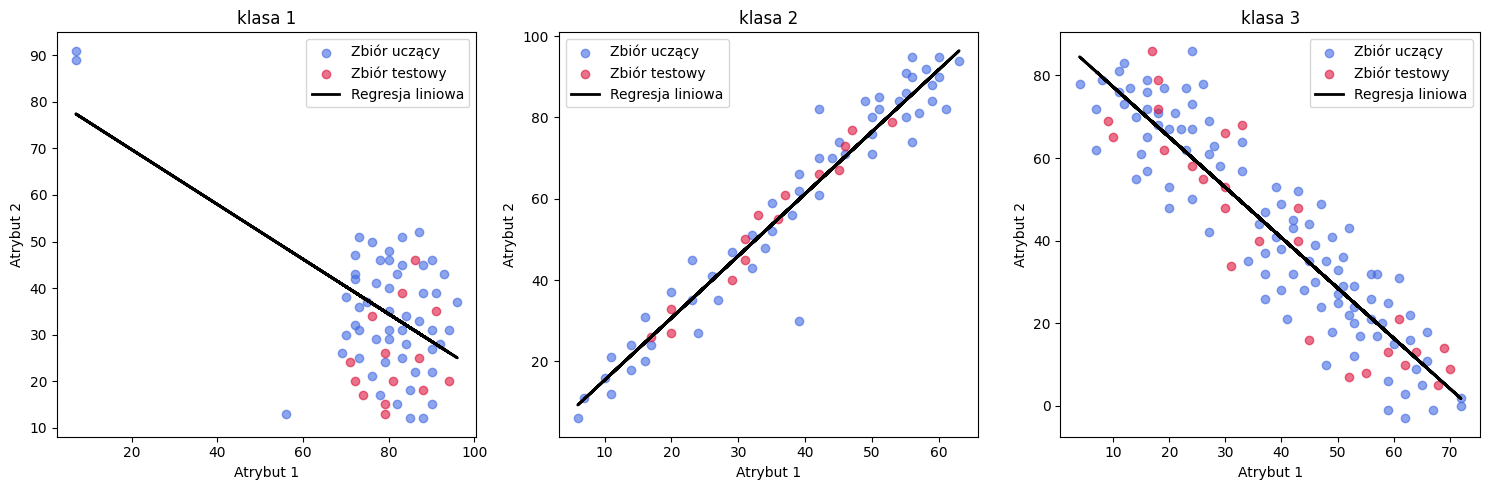

In [71]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

fig, axes = plt.subplots(ncols=3, figsize=(15, 5))

class_labels = ["klasa 1", "klasa 2", "klasa 3"]

for i, label in enumerate(class_labels):
    data_subset = d.query("klasa == @label")
    X = data_subset.iloc[:, 0].to_numpy().reshape(-1, 1)
    Y = data_subset.iloc[:, 1].to_numpy().reshape(-1, 1)

    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=0
    )

    model = LinearRegression()
    model.fit(X_train, Y_train)

    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    ax = axes[i]
    ax.scatter(X_train, Y_train, c="royalblue", alpha=0.6, label="Zbiór uczący")
    ax.scatter(X_test, Y_test, c="crimson", alpha=0.6, label="Zbiór testowy")
    ax.plot(X_train, Y_train_pred, "k-", lw=2, label="Regresja liniowa")
    ax.set_title(label)
    ax.set_xlabel("Atrybut 1")
    ax.set_ylabel("Atrybut 2")
    ax.legend()

    mse_train = metrics.mean_squared_error(Y_train, Y_train_pred)
    mse_test = metrics.mean_squared_error(Y_test, Y_test_pred)

    print(f"{label} → MSE (train): {mse_train:.4f}, MSE (test): {mse_test:.4f}")

plt.tight_layout()
plt.show()


Modele dla klasy 2 są najbardziej stabilne – punkty układają się niemal idealnie liniowo, więc współczynniki regresji i błędy zmieniają się minimalnie przy różnych podziałach danych.
W klasach 1 i 3 relacje między zmiennymi są bardziej rozproszone, co powoduje większe wahania wartości współczynników oraz błędów uczenia i testowania.
Najmniejsza stabilność występuje w klasie 1, ponieważ dane są nierównomiernie rozmieszczone i mniej liczne.


# 4. Estymacja parametrów regresji wielomianowej

W przypadku regresji liniowej linia trendu jest linią prostą - jest to szczególny, najprostszy przypadek. W przypadku ogólnym jest to krzywa opisana wielomianem. Współczynniki tego wielomianu mogą być wyznaczane z wykorzystaniem pseudoinwersji, która w efekcie swojego działania minimalizuje sumę kwadratów błędu aproksymacji lub poprzez metody iteracyjnej optymalizacji. Zostało to opisane we wprowadzeniu. Celem tej części laboratorium będzie napisanie programu, który pozwoli na wyznaczenie linii trendu dla punktów zebranych interaktywnie z wykresu. Aproksymatorem będzie w tym przypadku model regresji wielomianowej.  

> **Zadanie** Przy pomocy poniższego kodu wskaż 20 punktów klikając na wykresie tak, by układały się w linię trendu. W efekcie wykonanie poniższego kodu i zebrania punktów otrzymamy ramkę danych z kolumnami x i y. 

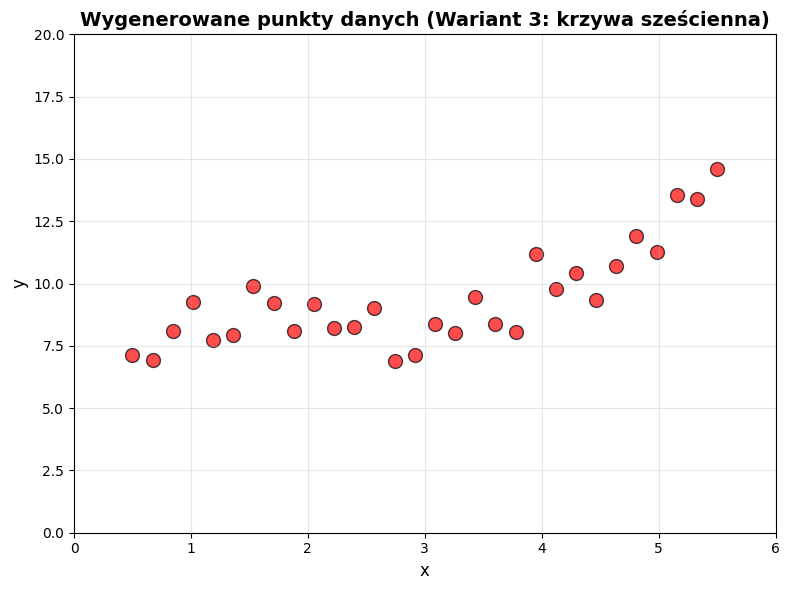

Wygenerowano 30 punktów danych
Zakres x: 0.50 - 5.50
Zakres y: 6.90 - 14.61


In [72]:
# Zrobiłem losowe dane do regresji wielomianowej ponieważ VIsual Studio Code nie pozwala na klikanie do projektów Jupyter Notebook

%matplotlib inline
np.random.seed(42)

ile_probek = 30

x_values = np.linspace(0.5, 5.5, ile_probek)
y_values = 0.2 * x_values**3 - 1.5 * x_values**2 + 4 * x_values + 5 + np.random.normal(0, 1, ile_probek)

df = pd.DataFrame({'x': x_values, 'y': y_values})

# Wizualizacja wygenerowanych punktów
plt.figure(figsize=(8, 6))
plt.scatter(df.x, df.y, color='red', s=100, alpha=0.7, edgecolors='black')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Wygenerowane punkty danych (Wariant 3: krzywa sześcienna)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xlim(0, 6)
plt.ylim(0, 20)
plt.tight_layout()
plt.show()

print(f"Wygenerowano {len(df)} punktów danych")
print(f"Zakres x: {df.x.min():.2f} - {df.x.max():.2f}")
print(f"Zakres y: {df.y.min():.2f} - {df.y.max():.2f}")

W efekcie udało się pozyskać następującą macierz (ramkę) danych:

In [73]:
print(df.info())
df.head(ile_probek)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       30 non-null     float64
 1   y       30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes
None


,x,y
0,0.500000,7.146714
1,0.672414,6.933985
2,0.844828,8.076995
3,1.017241,9.250350
4,1.189655,7.738287
5,1.362069,7.936682
6,1.534483,9.907818
7,1.706897,9.219384
8,1.879310,8.077528
9,2.051724,9.162475


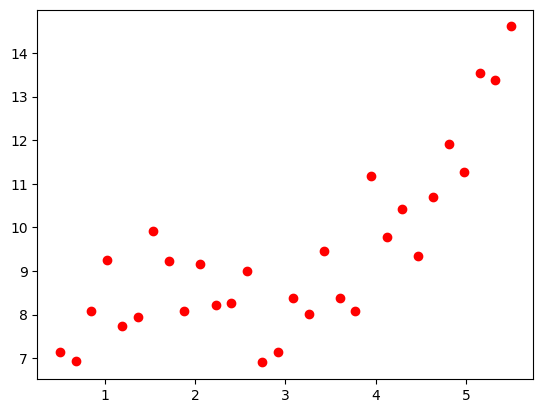

In [74]:
plt.scatter(df.x, df.y, color='red')

> **Zadanie** Napisz funkcję, która utworzy nam macierz $X$. Macierz $X$ powinna składać się z wektora jednostkowego oraz wektorów zawierających poszczególne potęgi zebranych argumentów (opis we wprowadzeniu). Funkcja ta może tworzyć macierz wykorzystując jako parametr wejściowy stopień wielomianu, którym będziemy chcieli dokonywać aproksymacji.

In [75]:
def create_polynomial_matrix(x, degree):
    
    n = len(x)
    X = np.ones((n, degree + 1))  # Inicjalizacja macierzy jedynkami
    
    for i in range(1, degree + 1):
        X[:, i] = x ** i
    
    return X

# Test funkcji
x_test = df.x.values
X_test = create_polynomial_matrix(x_test, 3)

print("Przykład macierzy X dla stopnia wielomianu = 3:")
print(f"Wymiar: {X_test.shape}")
print("\nPierwsze 5 wierszy:")
print(X_test[:5])
print("\nKolumny to: [1, x, x^2, x^3]")


Przykład macierzy X dla stopnia wielomianu = 3:
Wymiar: (30, 4)

Pierwsze 5 wierszy:
[[1.         0.5        0.25       0.125     ]
 [1.         0.67241379 0.45214031 0.30402538]
 [1.         0.84482759 0.71373365 0.60298188]
 [1.         1.01724138 1.03478002 1.05262106]
 [1.         1.18965517 1.41527943 1.68369449]]

Kolumny to: [1, x, x^2, x^3]


> **Zadanie** Przy pomocy funkcji pakietu _numpy_ wyliczającej pseudoinwersję _np.linalg.pinv()_ oraz mnożenia macierzy _np.dot()_ wylicz parametry modelu dla zbioru uczącego.

In [76]:
# Obliczanie parametrów modelu przy użyciu pseudoinwersji

# Przygotowanie danych
x_data = df.x.values
y_data = df.y.values

# Stopień wielomianu
degree = 3

# Utworzenie macierzy X
X = create_polynomial_matrix(x_data, degree)

# Obliczenie pseudoinwersji macierzy X
X_pinv = np.linalg.pinv(X)

# Obliczenie wektora parametrów w = X^+ * Y
w = np.dot(X_pinv, y_data)

print(f"Parametry wielomianu stopnia {degree}:")
print(f"w = {w}")
print(f"\nWielomian:")
print(f"f(x) = {w[0]:.4f}", end="")
for i in range(1, len(w)):
    sign = "+" if w[i] >= 0 else ""
    print(f" {sign}{w[i]:.4f}*x^{i}", end="")
print()

# Obliczenie predykcji
y_pred = np.dot(X, w)

# Błąd średniokwadratowy
mse = np.mean((y_data - y_pred)**2)
print(f"\nBłąd średniokwadratowy (MSE): {mse:.4f}")

Parametry wielomianu stopnia 3:
w = [ 6.01959728  3.41774953 -1.51659875  0.21541908]

Wielomian:
f(x) = 6.0196 +3.4177*x^1 -1.5166*x^2 +0.2154*x^3

Błąd średniokwadratowy (MSE): 0.6299


> **Zadanie** 
1. Wyświetl na pojedynczym wykresie, punkty danych oraz linie trendów dla wielomianów stopnia 1, 2, 3, 4 i 5.
2. Wyświetl wykres średniokwadratowego błędu dopasowania krzywej do punktów danych, w funkcji złożoności modelu (stopnia wielomianu). Czym się ta funkcja charakteryzuje ?


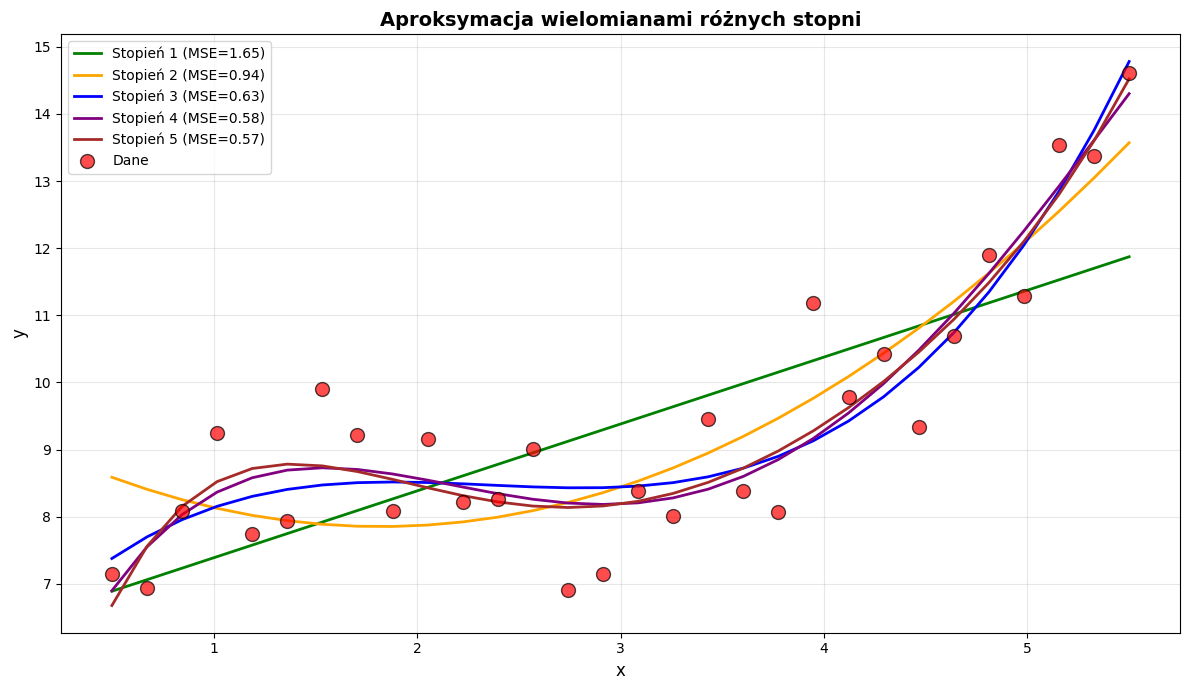

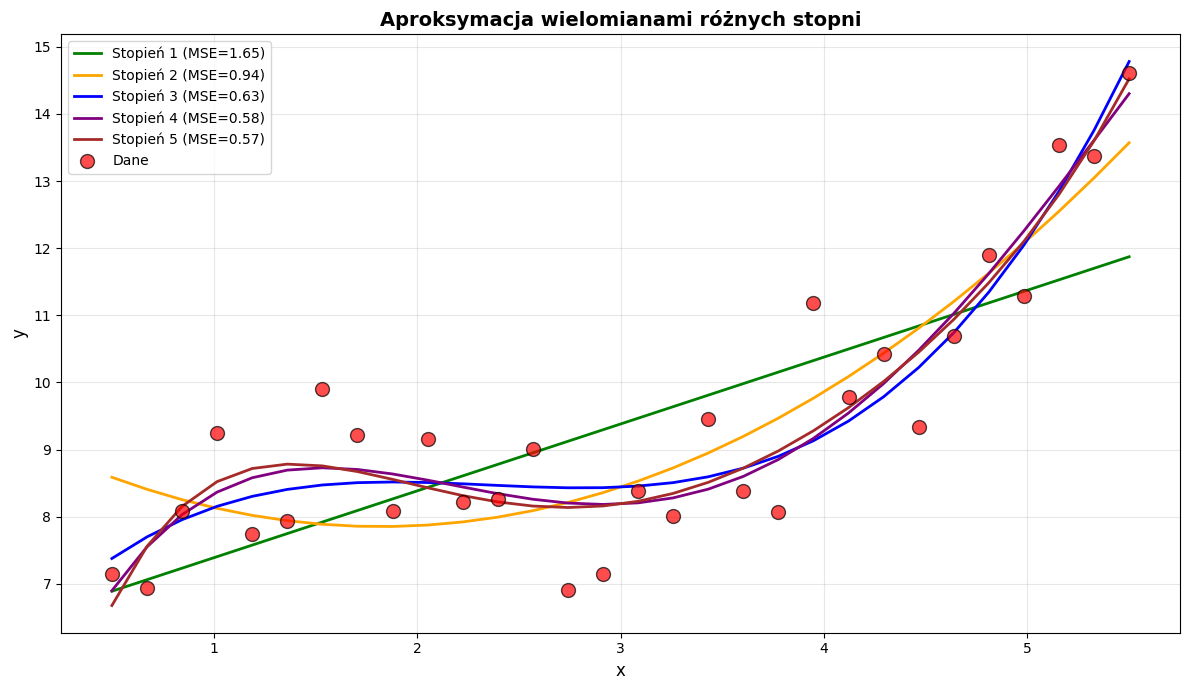

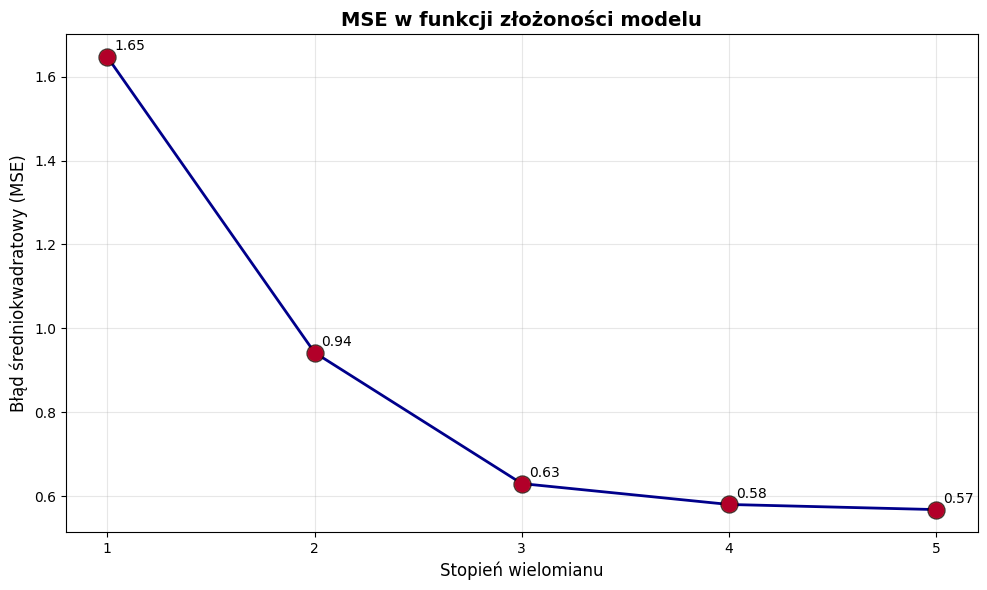

In [77]:
# 1. Wizualizacja wielomianów stopnia 1, 2, 3, 4, 5

degrees = [1, 2, 3, 4, 5]
colors = ['green', 'orange', 'blue', 'purple', 'brown']
mse_values = []

plt.figure(figsize=(12, 7))

# Dla każdego stopnia wielomianu
for deg, color in zip(degrees, colors):
    # Utworzenie macierzy X
    X = create_polynomial_matrix(x_data, deg)
    
    # Obliczenie parametrów
    X_pinv = np.linalg.pinv(X)
    w = np.dot(X_pinv, y_data)
    
    # Predykcja
    y_pred = np.dot(X, w)
    
    # Błąd
    mse = np.mean((y_data - y_pred)**2)
    mse_values.append(mse)
    
    # Wykres
    plt.plot(x_data, y_pred, color=color, linewidth=2, label=f'Stopień {deg} (MSE={mse:.2f})')

# Dodaj punkty danych
plt.scatter(x_data, y_data, color='red', s=100, alpha=0.7, edgecolors='black', 
            label='Dane', zorder=5)

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Aproksymacja wielomianami różnych stopni', fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Wykres MSE w funkcji stopnia wielomianu

plt.figure(figsize=(10, 6))
plt.plot(degrees, mse_values, marker='o', markersize=10, linewidth=2, color='darkblue')
plt.scatter(degrees, mse_values, s=150, color='red', alpha=0.7, edgecolors='black', zorder=5)

for deg, mse in zip(degrees, mse_values):
    plt.annotate(f'{mse:.2f}', xy=(deg, mse), xytext=(5, 5), 
                 textcoords='offset points', fontsize=10)

plt.xlabel('Stopień wielomianu', fontsize=12)
plt.ylabel('Błąd średniokwadratowy (MSE)', fontsize=12)
plt.title('MSE w funkcji złożoności modelu', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(degrees)
plt.tight_layout()
plt.show()




Funkcja MSE maleje wraz ze wzrostem stopnia wielomianu
Im wyższy stopień, tym lepsze dopasowanie do danych uczących
Wielomian wysokiego stopnia może prowadzić do przeuczenia (overfitting)
(MSE = 0), ale może bardzo źle generalizować na nowe dane

> **Zadanie** Zajdź funkcię wbudowaną pakietu `numpy`, która zwraca wartości współczynników wielomianu dla zadanych punktów (czyli realizuje to co powyżej udało się zrobić "ręcznie").

PORÓWNANIE: Metoda ręczna (pseudoinwersja) vs numpy.polyfit()

Stopień wielomianu: 3

Metoda numpy.polyfit():
  Współczynniki: [ 0.21541908 -1.51659875  3.41774953  6.01959728]
  Model: y = 6.0196 + 3.4177*x + -1.5166*x² + 0.2154*x³


PORÓWNANIE: Metoda ręczna (pseudoinwersja) vs numpy.polyfit()

Stopień wielomianu: 3

Metoda numpy.polyfit():
  Współczynniki: [ 0.21541908 -1.51659875  3.41774953  6.01959728]
  Model: y = 6.0196 + 3.4177*x + -1.5166*x² + 0.2154*x³


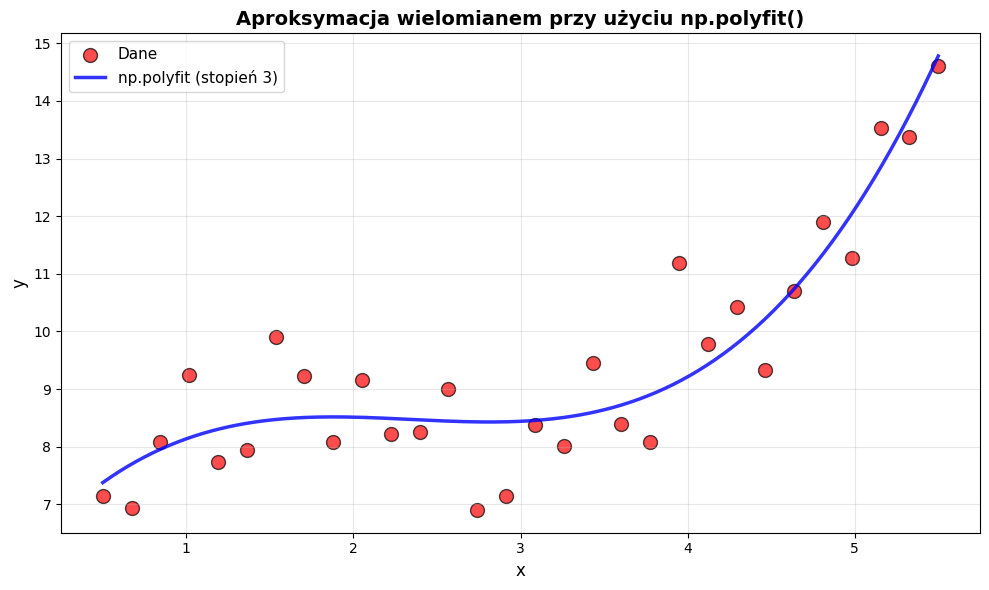


Błąd średniokwadratowy (MSE): 0.6299

✓ np.polyfit() to wbudowana funkcja numpy do dopasowania wielomianów!


In [78]:
# Funkcja numpy.polyfit() - wbudowana funkcja do dopasowania wielomianu

print("=" * 70)
print("PORÓWNANIE: Metoda ręczna (pseudoinwersja) vs numpy.polyfit()")
print("=" * 70)

degree = 3

# Metoda 1: Wbudowana funkcja numpy.polyfit()
w_polyfit = np.polyfit(x_data, y_data, degree)

print(f"\nStopień wielomianu: {degree}")
print(f"\nMetoda numpy.polyfit():")
print(f"  Współczynniki: {w_polyfit}")
print(f"  Model: y = {w_polyfit[3]:.4f} + {w_polyfit[2]:.4f}*x + {w_polyfit[1]:.4f}*x² + {w_polyfit[0]:.4f}*x³")

# Wizualizacja - np.polyfit() z np.polyval()
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color='red', s=100, alpha=0.7, edgecolors='black', label='Dane')

x_smooth = np.linspace(x_data.min(), x_data.max(), 300)

# Predykcja używając np.polyval() (funkcja towarzysząca do np.polyfit())
y_smooth_polyfit = np.polyval(w_polyfit, x_smooth)

plt.plot(x_smooth, y_smooth_polyfit, 'b-', linewidth=2.5, label=f'np.polyfit (stopień {degree})', alpha=0.8)

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Aproksymacja wielomianem przy użyciu np.polyfit()', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Oblicz błąd MSE
y_pred_polyfit = np.polyval(w_polyfit, x_data)
mse_polyfit = np.mean((y_data - y_pred_polyfit)**2)
print(f"\nBłąd średniokwadratowy (MSE): {mse_polyfit:.4f}")

print("\n✓ np.polyfit() to wbudowana funkcja numpy do dopasowania wielomianów!")

> **Zadanie** Podziel zbiór na uczacy i testowy, a następnie powtórz wcześniejszy eksperyment z uwzględnieniem tego podziału. W szczególności: 
1. Wyświetl na pojedynczym wykresie, punkty danych oraz linie trendów dla wielomianów kilku wybranych stopni wyznaczonych dla zbioru uczącego.
2. Wyświetl wykres błędu uczenia (tj. dopasowania punktów zbioru uczącego) i generalizacji (tj. dopasowania punktów zbioru testowego) w funkcji złożoności modelu (stopnia wielomianu).
3. Wybierz stopień wielomianu, który najlepiej opisuje Twoje punkty danych z uwzględnieniem podziału na zbiór uczący i testowy. Co należy uwzględnić dokonując takiego wyboru ?

Rozmiar zbioru uczącego: 21
Rozmiar zbioru testowego: 9


Rozmiar zbioru uczącego: 21
Rozmiar zbioru testowego: 9


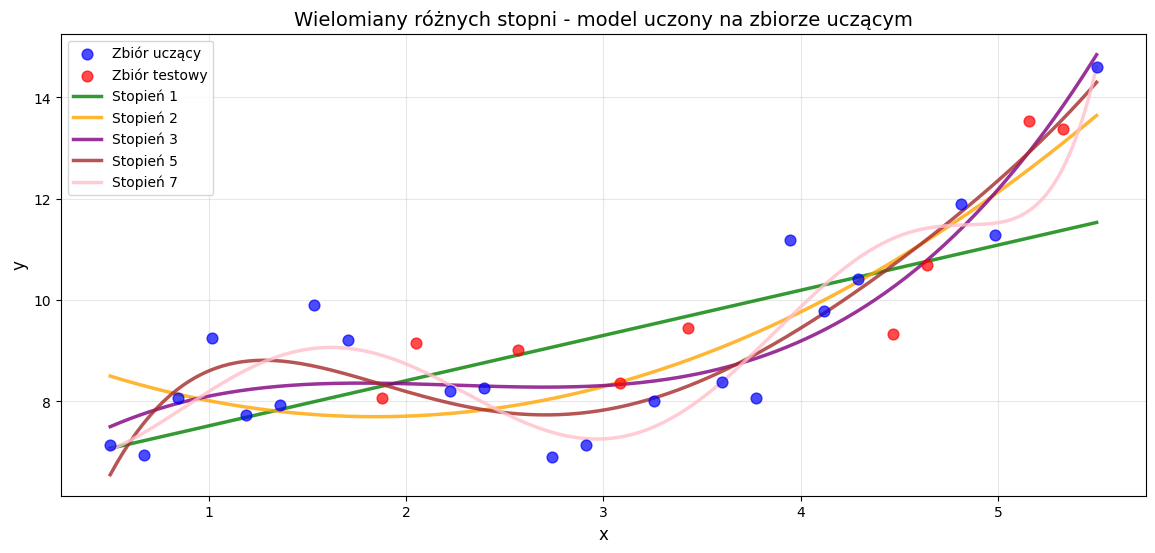

Rozmiar zbioru uczącego: 21
Rozmiar zbioru testowego: 9


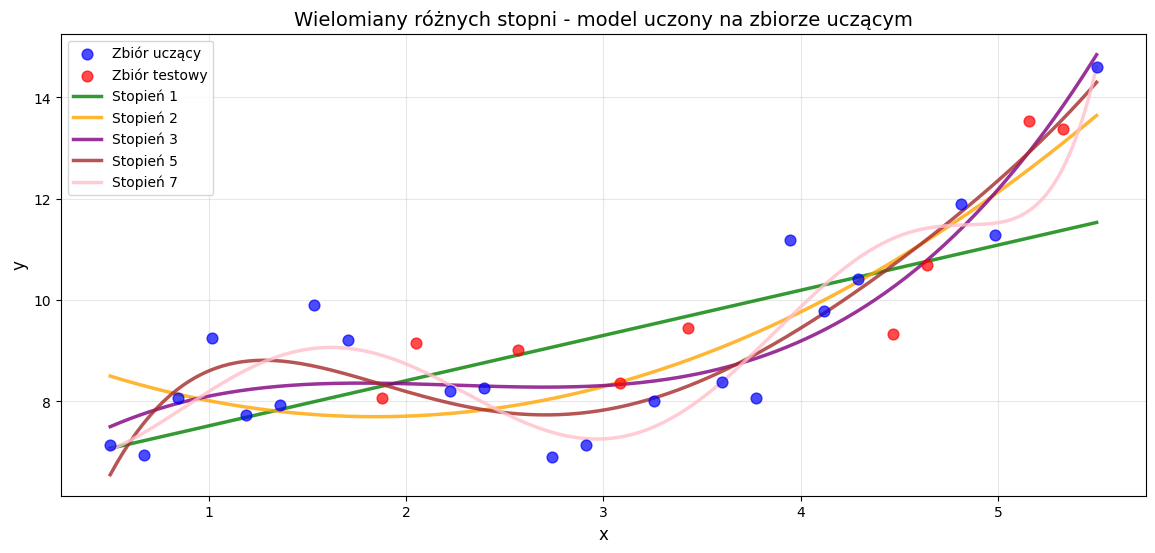

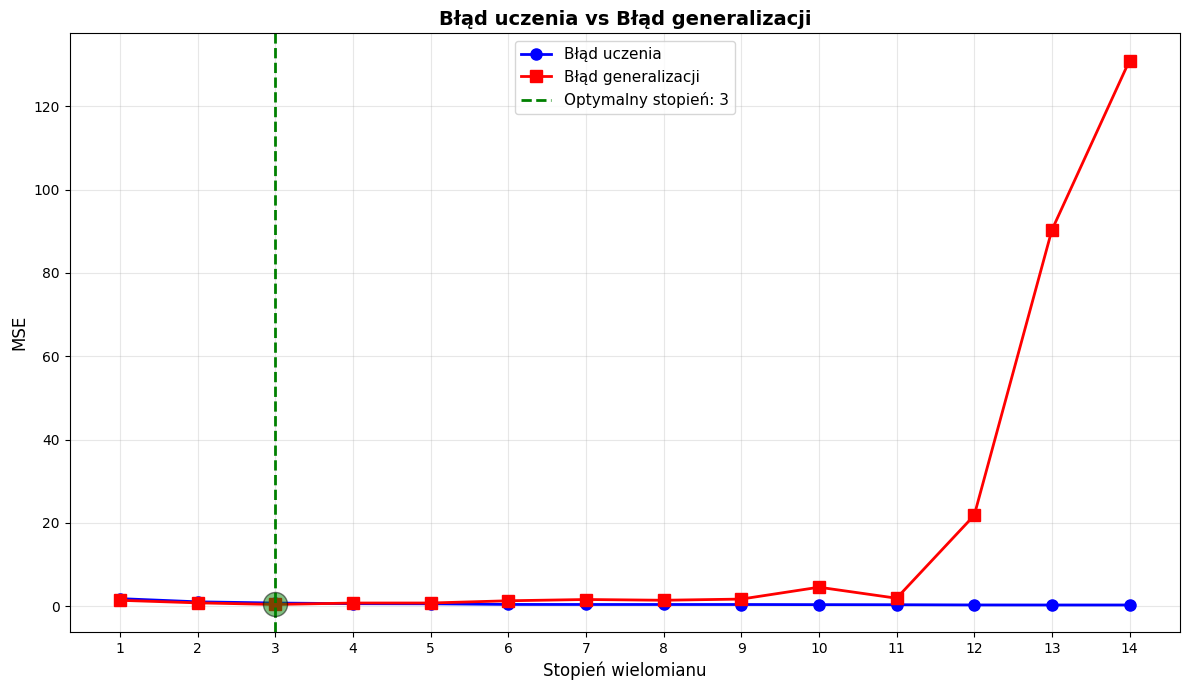

In [79]:
# Podział na zbiór uczący i testowy
x_ucz, x_test, y_ucz, y_test = train_test_split(df.x, df.y, test_size=0.3, random_state=42)

print(f"Rozmiar zbioru uczącego: {len(x_ucz)}")
print(f"Rozmiar zbioru testowego: {len(x_test)}")

# 1. Wizualizacja wielomianów różnych stopni na zbiorze uczącym

plt.figure(figsize=(14, 6))
plt.scatter(x_ucz, y_ucz, color='blue', s=60, alpha=0.7, label='Zbiór uczący', zorder=5)
plt.scatter(x_test, y_test, color='red', s=60, alpha=0.7, label='Zbiór testowy', zorder=5)
x_smooth = np.linspace(df.x.min(), df.x.max(), 300)
colors = ['green', 'orange', 'purple', 'brown', 'pink']
degrees = [1, 2, 3, 5, 7]

for degree, color in zip(degrees, colors):
    X_ucz = create_polynomial_matrix(x_ucz, degree)
    Y_ucz = y_ucz.values.reshape(-1, 1)
    X_pinv = np.linalg.pinv(X_ucz)
    w = np.dot(X_pinv, Y_ucz)
    X_smooth = create_polynomial_matrix(x_smooth, degree)
    y_smooth = np.dot(X_smooth, w)
    plt.plot(x_smooth, y_smooth, color=color, linewidth=2.5, 
             label=f'Stopień {degree}', alpha=0.8)

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Wielomiany różnych stopni - model uczony na zbiorze uczącym', fontsize=14)
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

# 2. Wykres błędu uczenia i generalizacji

degrees_range = range(1, 15)
train_errors = []
test_errors = []

for deg in degrees_range:
    # Dopasowanie na zbiorze uczącym
    X_ucz = create_polynomial_matrix(x_ucz.values, deg)
    Y_ucz = y_ucz.values.reshape(-1, 1)
    X_pinv = np.linalg.pinv(X_ucz)
    w = np.dot(X_pinv, Y_ucz)
    
    # Predykcje na zbiorze uczącym
    y_train_pred = np.dot(X_ucz, w).flatten()
    
    # Predykcje na zbiorze testowym
    X_test = create_polynomial_matrix(x_test.values, deg)
    y_test_pred = np.dot(X_test, w).flatten()
    
    # Błędy
    train_mse = np.mean((y_ucz.values - y_train_pred)**2)
    test_mse = np.mean((y_test.values - y_test_pred)**2)
    
    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Wykres
plt.figure(figsize=(12, 7))
plt.plot(list(degrees_range), train_errors, marker='o', markersize=8, 
         linewidth=2, color='blue', label='Błąd uczenia')
plt.plot(list(degrees_range), test_errors, marker='s', markersize=8, 
         linewidth=2, color='red', label='Błąd generalizacji')

# Zaznacz minimum błędu testowego
min_test_idx = np.argmin(test_errors)
optimal_degree = list(degrees_range)[min_test_idx]
plt.axvline(x=optimal_degree, color='green', linestyle='--', linewidth=2, 
            label=f'Optymalny stopień: {optimal_degree}')
plt.scatter([optimal_degree], [test_errors[min_test_idx]], 
            s=300, color='green', alpha=0.5, edgecolors='black', zorder=5)

plt.xlabel('Stopień wielomianu', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.title('Błąd uczenia vs Błąd generalizacji', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(list(degrees_range))
plt.tight_layout()
plt.show()




Optymalny stopień wielomianu to 3. Dla tego stopnia błąd generalizacji osiąga minimum. Dla wyższych stopni błąd testowy drastycznie rośnie, co oznacza przeuczenie modelu, które memoryzuje szum zamiast uczyć się ogólnych wzorów.


> **Zadanie** Odpowiedz na następujące pytania sprawdzające:
1. Czy jesteśmy w stanie zminimalizować błąd uczenia do 0, jeśli tak to jaki warunek musi być spełniony?
2. Czy powinniśmy tak dobierać stopień wielomianu aby błąd uczenia był jak najmniejszy?
3. Czy równanie zawsze posiada rozwiązanie przybliżone?
4. Co się dzieje z wielkością parametrów modelu w miarę zwiększania stopnia wielomianu?



### 1. 

Tak, możemy zminimalizować błąd uczenia do 0, jeśli stopień wielomianu będzie większy lub równy liczbie punktów minus 1. Dla n punktów wielomian stopnia n-1 przechodzi przez wszystkie punkty (pod warunkiem, że nie mają identycznych wartości x). Należy jednak pamiętać, że błąd uczenia równy 0 zazwyczaj oznacza przeuczenie modelu.

### 2. 
Nie, to błędne podejście, które prowadzi do przeuczenia modelu. Zamiast minimalizować błąd uczenia, należy minimalizować błąd generalizacji na zbiorze testowym. Właściwy model to kompromis między dopasowaniem do danych uczących a zdolnością do generalizacji.

### 3. 

Tak, równanie Xw = Y zawsze posiada rozwiązanie przybliżone, ponieważ pseudoinwersja macierzy X zawsze istnieje. Rozwiązanie w = X⁺Y minimalizuje normę ||Xw - Y||² metodą najmniejszych kwadratów. Nawet jeśli układ równań jest sprzeczny, znajdziemy najlepsze możliwe przybliżenie.

### 4. 

Parametry modelu rosną eksponencjalnie wraz ze wzrostem stopnia wielomianu. Wyższe stopnie wymagają większych współczynników, aby precyzyjnie dopasować krzywą do każdego punktu, co prowadzi do oscylacji między punktami. Skutkuje to niestabilnością numeryczną i bardzo złymi przewidywaniami poza zakresem danych treningowych.